In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import Lasso
from sklearn.cluster import KMeans
import copy
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [74]:
conc_Data = pd.read_csv('concrete.csv')

In [75]:
conc_Data.shape

(1030, 9)

In [76]:
conc_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [77]:
conc_Data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#### 1. a.Exploratory data quality report
#### a. Univariante analysis

In [78]:
conc_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [79]:
# zero values present for ash ,slag and superplastic
# Looking at description of data we can see there are outliers present in data

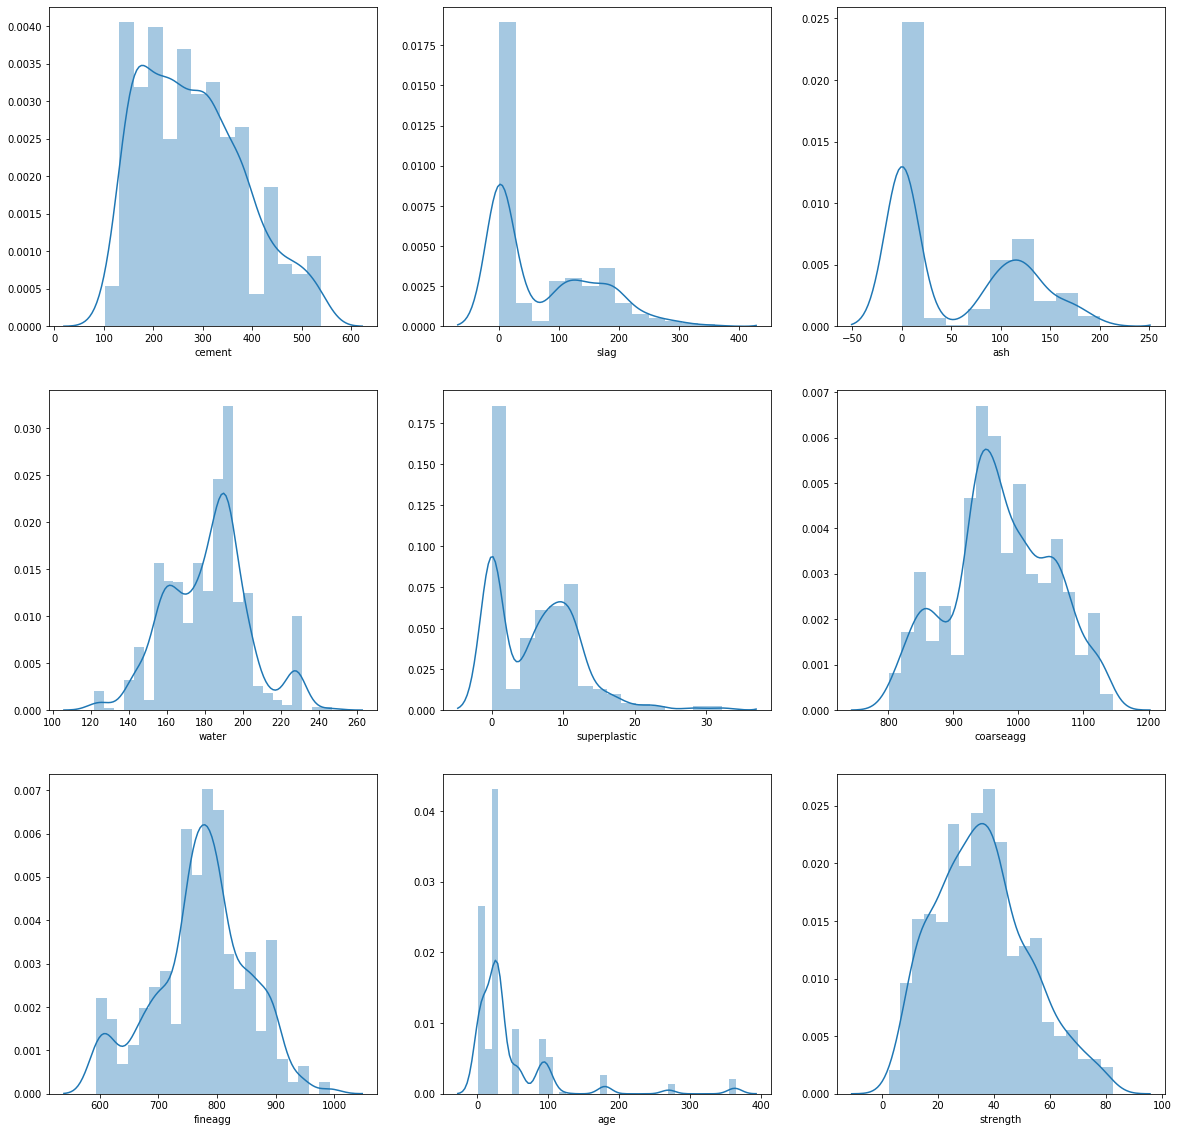

In [80]:
# DIST plot to check gaissians and get idea how attributes are distributed

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20,20))
for i, column in enumerate(conc_Data.columns): sns.distplot(conc_Data[column],ax=axes[i//3,i%3],kde=True)

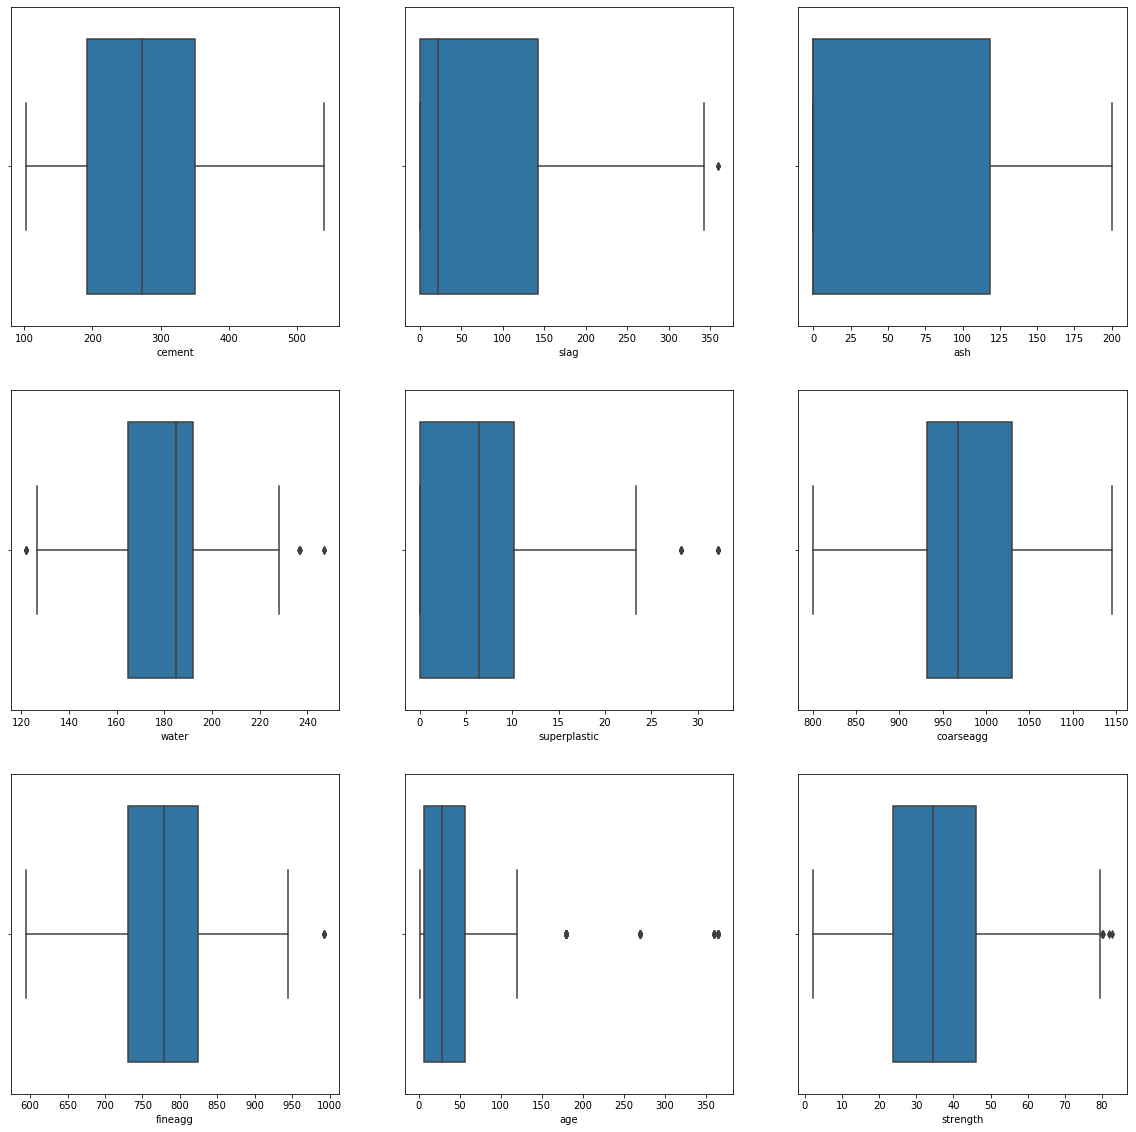

In [81]:
# Check outliers presence using box plot
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20,20))

for i, column in enumerate(conc_Data.columns): 
    sns.boxplot(conc_Data[column],ax=axes[i//3,i%3])

In [11]:
# outliers present for water,superplastic,slag and fineagg age

##### bi variante analysis


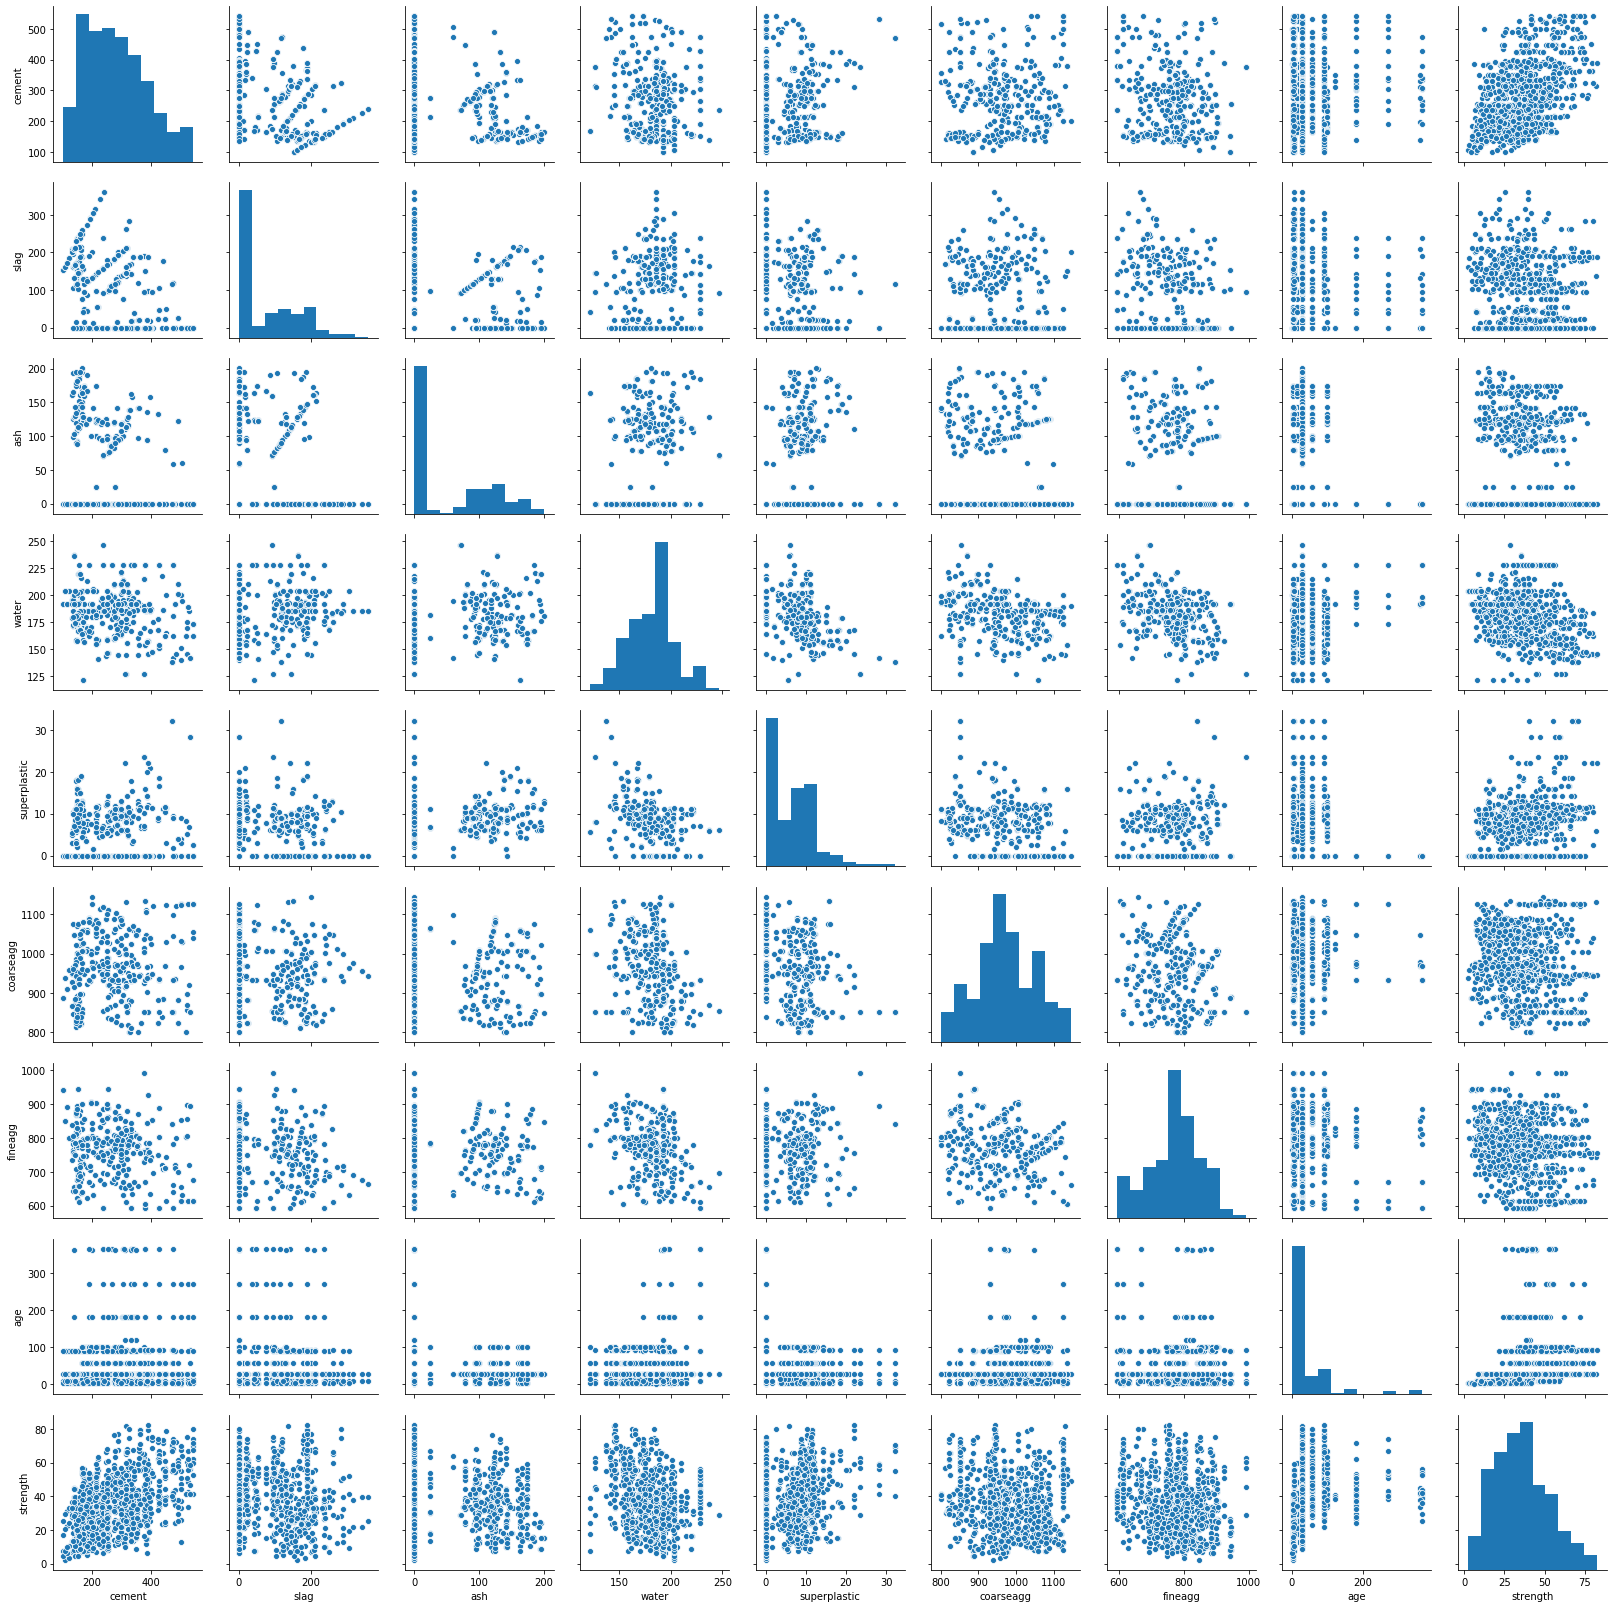

In [127]:

sns.pairplot(conc_Data)

([<matplotlib.axis.YTick at 0x7ffb82cff550>,
 <a list of 9 Text yticklabel objects>)

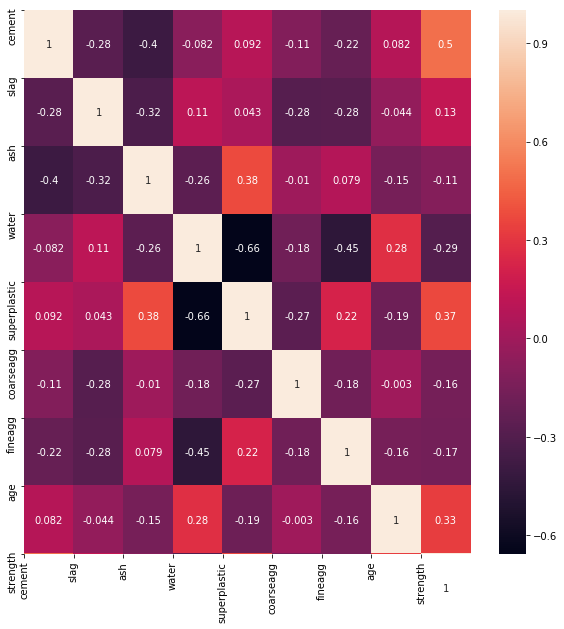

In [82]:
# Get idea how independent attributes are releated with target variable usin corelation matrix
correlation_matrix = conc_Data.corr() 

fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(correlation_matrix, annot=True, ax=ax)  

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns) 

plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns) 

In [83]:
# looking at coorelation matrix we cant drop any column directly,there seems to be some relation ,
# We ned to apply model and see which features are important


Outliers treament

In [85]:

for i in conc_Data.columns:
    q1, q2, q3 = conc_Data[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = conc_Data[i] > q3 + 1.5*IQR
    b = conc_Data[i] < q1 - 1.5*IQR
    conc_Data[i] = np.where(a | b, q2, conc_Data[i]) 

In [86]:
# scaling data to apply clusetering ,lassso
conc_Data_Z = conc_Data.apply(zscore) 

In [89]:
# a. Identify opportunities (if any) to create a composite feature, drop a
# feature etc.
# Applying lasso regression to get idea of which attributes can be convert to approx zero coefficients 


In [90]:
X_scaled = conc_Data_Z.drop('strength',axis = 1)
y_scaled = conc_Data_Z['strength']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [92]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.44809348  0.14394514 -0.         -0.05773007  0.17133925 -0.
 -0.          0.41087206]


In [93]:
# lasso result: as number of attributes are less lasso model tried to make coeffiecient zero for some feature,
# but these can not be dropped directly as number of attributes are less 
# it has made zero value for coeffiecient for ash,coarseagg,fineagg

In [94]:
# make composit of independent attributes,and apply model with more number of attributes
# with more degree
polynomial_results = pd.DataFrame(columns={'Degree','Training data Accuracy','Testing data Accuracy'})
def get_polynomial_results(deg):
    polynomial = PolynomialFeatures(degree = deg, interaction_only=True)
    X_scaled_P = polynomial.fit_transform(X_scaled)
    X_train_P, X_test_P, y_train, y_test = train_test_split(X_scaled_P, y_scaled, test_size=0.30, random_state=1)
    
    
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train_P,y_train)

#     regression_model = LinearRegression()
#     regression_model.fit(X_train_P, y_train)
    
    return {'Degree':deg,'Training data Accuracy':lasso.score(X_train_P, y_train),'Testing data Accuracy':lasso.score(X_test_P, y_test)}


In [95]:
for deg in np.arange(1,6):
    accuracy = get_polynomial_results(deg)
    polynomial_results = polynomial_results.append(accuracy,ignore_index=True)
polynomial_results

,Testing data Accuracy,Degree,Training data Accuracy
0,0.596985,1.0,0.656969
1,0.593002,2.0,0.658499
2,0.593370,3.0,0.660382
3,0.593370,4.0,0.660382
4,0.593370,5.0,0.660382


In [96]:
# Explore for gaussians


In [97]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(conc_Data_Z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7560.924257
2,3,6372.616362
3,4,5583.407847
4,5,5122.869624
5,6,4707.239512
6,7,4239.178968
7,8,3972.895946
8,9,3741.364910
9,10,3529.830890


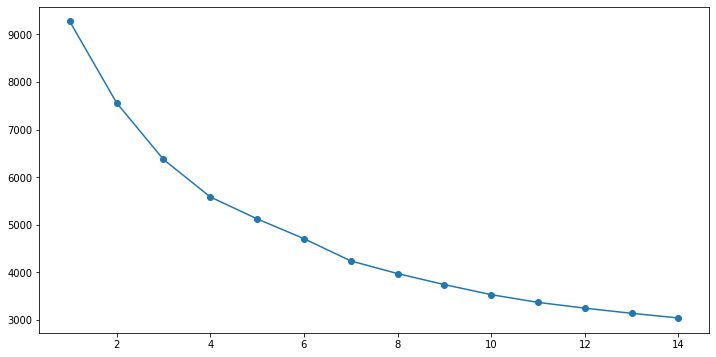

In [98]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [99]:
# crating 6 clusters
kmeans = KMeans(n_clusters=6, n_init = 5, random_state=12345)
kmeans.fit(conc_Data_Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [100]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[181 187 170  91 268 133]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb854de510>,
      dtype=object)

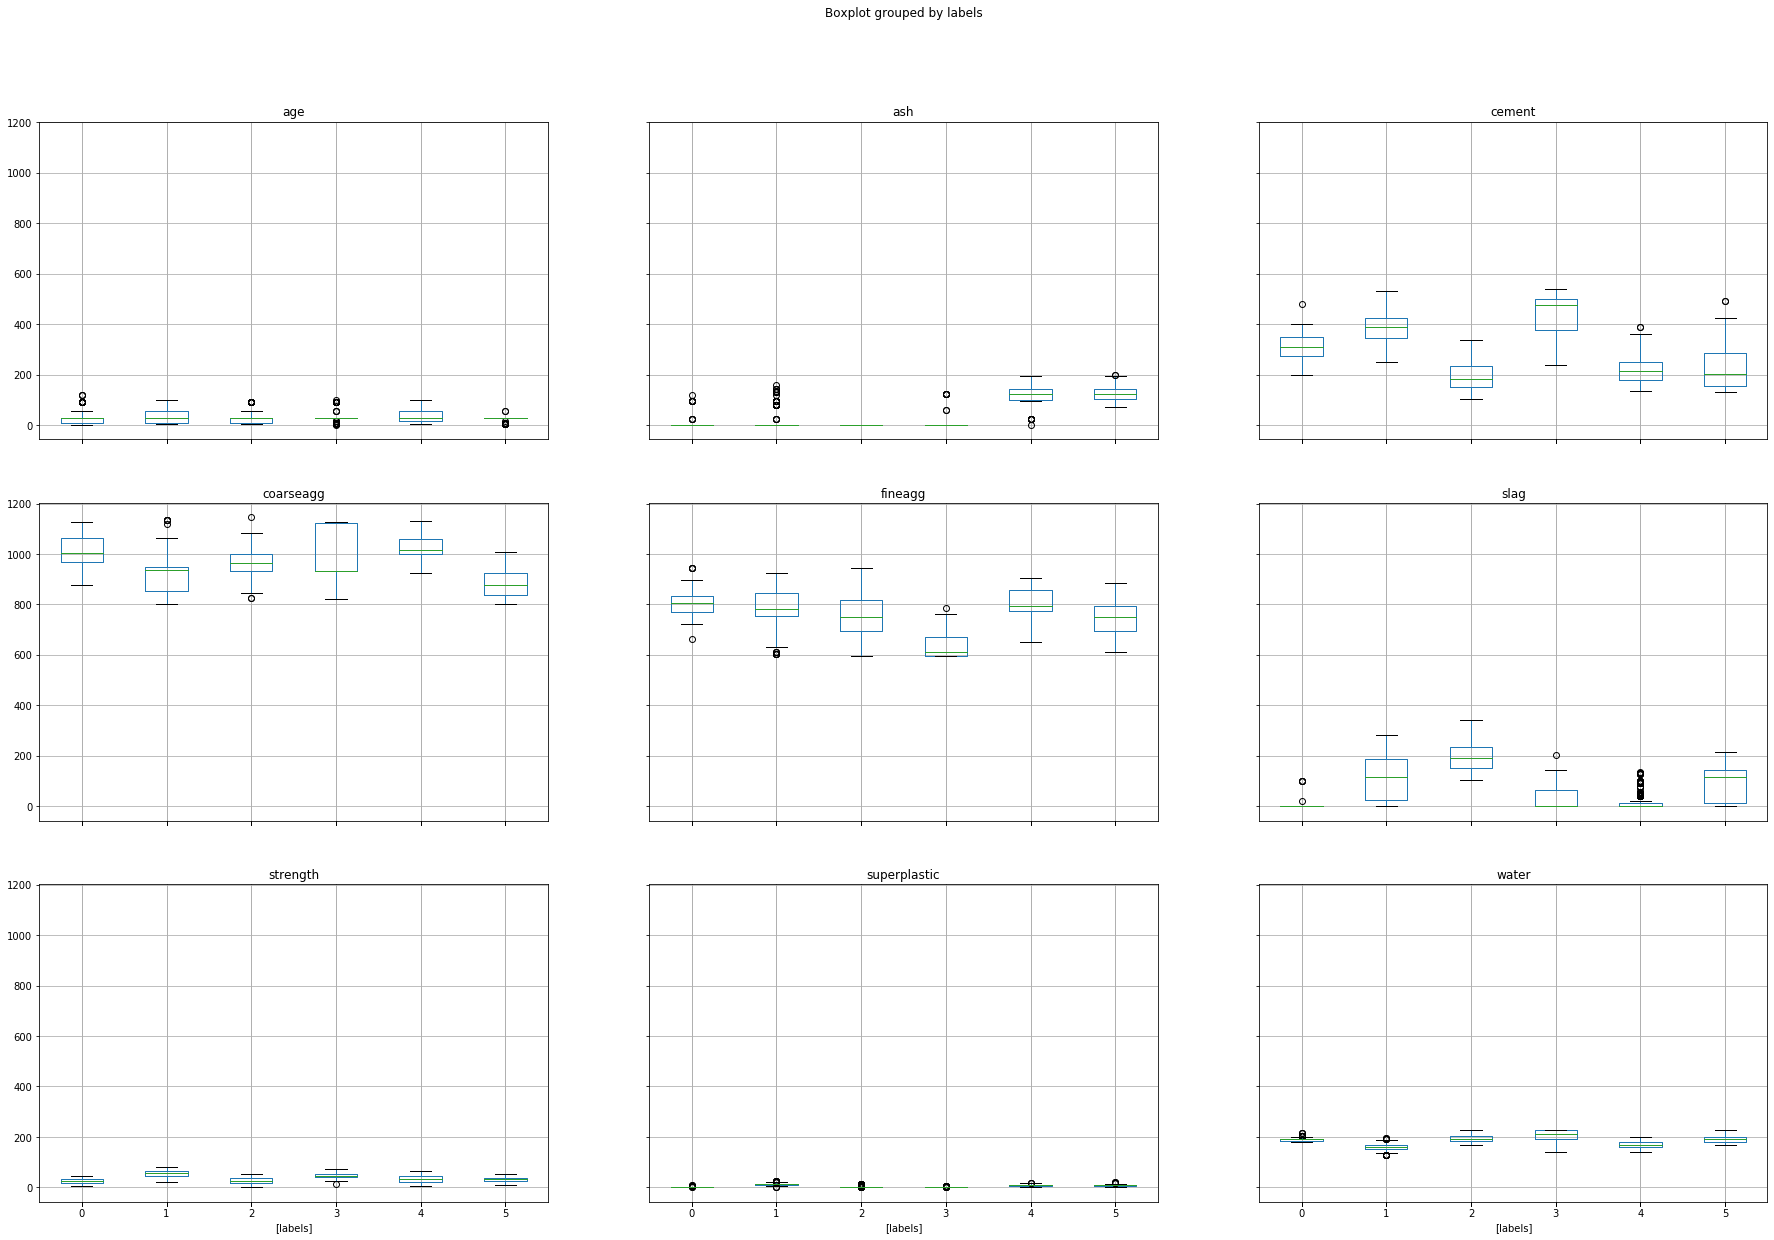

In [101]:
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
conc_Data_labeled = conc_Data.join(cluster_labels)

conc_Data_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20))

No distinct clusters are there as for all attributes cluster quartiles are ovrlapping
Which means there will be no gain to apply model into varipus clusters 

In [102]:
# feature importance
dTree = DecisionTreeRegressor(random_state=12)
dTree.fit(X_train,y_train)
print(dTree.score(X_train,y_train))
print(dTree.score(X_test,y_test))

0.9915301261289264
0.8128964737149371


In [103]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.348496
slag          0.089424
ash           0.012675
water         0.129043
superplastic  0.022166
coarseagg     0.029451
fineagg       0.040410
age           0.328335


Findings for Important features :
1. Looks like slag,ash and super plastic are not adding much value as independent variables
2. We can compare same with result of lasso model where also model converted coefficients to zero
3. Among all attributes cement,water and age are important features in data

In [104]:
conc_Data_Z_modified =  conc_Data_Z.drop(['coarseagg','ash','superplastic'],axis=1)

In [105]:
# with less features
X_mod_scaled = conc_Data_Z_modified.drop('strength',axis = 1)
y_mod_scaled = conc_Data_Z_modified['strength']

X_mod_train, X_mod_test, y_train, y_test = train_test_split(X_mod_scaled, y_mod_scaled, test_size=0.30, random_state=1)

dTree = DecisionTreeRegressor(random_state=12)
dTree.fit(X_mod_train,y_train)
print(dTree.score(X_mod_train,y_train))
print(dTree.score(X_mod_test,y_test))

0.9908765757777226
0.7923186098423659


In [107]:
# Still we are getting 79% of accuracy after dropping some attributes

In [108]:
# 4. Tuning

Suitable algorithms for project:
    1.Linear Regression
    2.DecisionTree regression
    3.RandomForest Regressor
    4.GradientBoosting Regressor
    5.Bagging Regressor

In [109]:
rf = RandomForestRegressor(random_state = 1)


In [110]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)>

In [111]:
n_estimators = np.arange(10,100,20)
max_depth = np.arange(3,9,3)
max_features = ['auto', 'log2']
min_samples_leaf = np.arange(1,5)
bootstrap = [True, False]
# np.arange(5,50,5)

In [112]:
random_grid =  {'n_estimators' : n_estimators,
               'max_depth': max_depth,
               'max_features' : max_features,
                'min_samples_leaf':min_samples_leaf,
               'bootstrap' : bootstrap}

In [113]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [114]:
rf_random.fit(X_mod_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    7.4s finished


In [115]:
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 6,
 'bootstrap': True}

In [116]:
best_random = rf_random.best_estimator_

In [117]:
print(best_random.score(X_mod_train , y_train))
print(best_random.score(X_mod_test , y_test))

0.8903054620668815
0.8132932197818579


In [118]:
# Performance of our model has been improved by applying random search CV and also it is giving good accracy oon both training and testing data


In [119]:
# Applying k fold validation 

In [120]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = best_random
results = cross_val_score(model, X_mod_scaled, y_mod_scaled, cv=kfold)

/home/arun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [121]:
print(results)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.7698085  0.82841428 0.83141497 0.81705213 0.84027861 0.8736018
 0.86045378 0.81043375 0.8525567  0.78879998]
Accuracy: 82.73% (3.04%)


#### Summary:

1. With confidance interval of 95 % we can say that with using random forest classifiers we can get acc 82.51% with std deviation 2.59% 
2. In Provided data there were zero values present but we could not drop these data directy or replace by mean or median
3. By exploring clusters we didnt find any clear groups for which we can apply models separately for better results
4. Applying random grid search CV and K Fold improved the proformance of results without making model underfit or overfit